GLOBAL EDUCATIÓN (2015-2020) 
EDA EXPLORATORY ANALYSIS ON GLOBAL LEVEL EDUCATION

We import the libraries that we are going to use to create the graphs. We are going to use the pyplot library.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import wilcoxon

We read the datasets
This code reads a CSV file and loads it into a pandas DataFrame, which is a two-dimensional data structure, similar to a table in an SQL database, an Excel spreadsheet, or an HTML table.

In [2]:
df = pd.read_csv('1- share-of-the-world-population-with-at-least-basic-education.csv')

In [6]:
df.head()

,Entity,Code,Year,"Share of population with no formal education, 1820-2020","Share of population with some formal education, 1820-2020"
0,Albania,ALB,2015,2.0,98.0
1,Albania,ALB,2020,1.0,99.0
2,Algeria,DZA,2015,16.0,84.0
3,Algeria,DZA,2020,13.0,87.0
4,Argentina,ARG,2015,2.0,98.0


In [7]:
df2 = pd.read_csv('2- learning-adjusted-years-of-school-lays.csv')

In [8]:
df2.head()

,Entity,Code,Year,Learning-Adjusted Years of School
0,Afghanistan,AFG,2017,4.870000
1,Afghanistan,AFG,2018,4.949788
2,Afghanistan,AFG,2020,5.052838
3,Africa,NaN,2017,4.931378
4,Africa,NaN,2018,5.123904


In [9]:
df3 = pd.read_csv ('3- number-of-out-of-school-children.csv')

In [10]:
df3.head()

,Entity,Code,Year,"Out-of-school children, adolescents and youth of primary and secondary school age, male (number)","Out-of-school children, adolescents and youth of primary and secondary school age, female (number)"
0,Albania,ALB,2000,78614.0,81341.0
1,Albania,ALB,2001,77837.0,78849.0
2,Albania,ALB,2013,27879.0,21727.0
3,Albania,ALB,2014,21542.0,16571.0
4,Albania,ALB,2015,18407.0,13250.0


In [11]:
df4 = pd.read_csv('4- gender-gap-education-levels.csv')

In [12]:
df4.head()

,Entity,Code,Year,"Combined gross enrolment ratio for tertiary education, female","Combined gross enrolment ratio for tertiary education, male","Combined total net enrolment rate, secondary, male","Combined total net enrolment rate, secondary, female","Combined total net enrolment rate, primary, female","Combined total net enrolment rate, primary, male"
0,Afghanistan,AFG,1986,0.62182,3.60227,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1990,1.40606,2.96306,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2003,0.51657,1.82170,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2004,0.51396,1.82145,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2009,1.41213,5.97378,NaN,NaN,NaN,NaN


In [86]:
print(df.columns)


Index(['Entity', 'Code', 'Year',
       'Share of population with no formal education, 1820-2020',
       'Share of population with some formal education, 1820-2020'],
      dtype='object')


Here is what the first data set looks like

Proportion of global education with at least basic education

In [14]:
basic_education = pd.read_csv('1- share-of-the-world-population-with-at-least-basic-education.csv')

# Calculate proportion
total_population = basic_education['Share of population with no formal education, 1820-2020'] + basic_education['Share of population with some formal education, 1820-2020']
basic_education['Proportion_with_basic_education'] = 1 - basic_education['Share of population with no formal education, 1820-2020'] / total_population


In [15]:
basic_education.head()

,Entity,Code,Year,"Share of population with no formal education, 1820-2020","Share of population with some formal education, 1820-2020",Proportion_with_basic_education
0,Albania,ALB,2015,2.0,98.0,0.98
1,Albania,ALB,2020,1.0,99.0,0.99
2,Algeria,DZA,2015,16.0,84.0,0.84
3,Algeria,DZA,2020,13.0,87.0,0.87
4,Argentina,ARG,2015,2.0,98.0,0.98


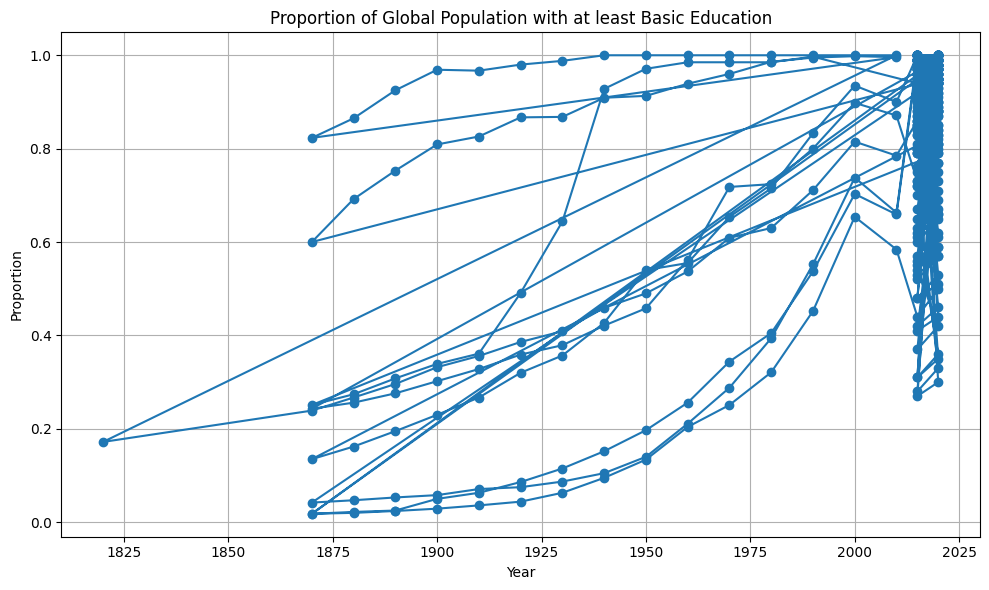

In [16]:
# create the graph
plt.figure(figsize=(10, 6))
plt.plot(basic_education['Year'], basic_education['Proportion_with_basic_education'], marker='o', linestyle='-')
plt.title('Proportion of Global Population with at least Basic Education')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.grid(True)
plt.tight_layout()

# graph
plt.show()

The graph shows the proportion of the world population with at least a basic education over time, from 1820 to beyond the year 2020. The data is presented in a line graph with multiple lines representing different trajectories or groups within the population. The Y-axis shows the proportion, varying from 0 to 1, and the X-axis represents the years. This image shows the increasing trend of the world population achieving at least a basic education over time, highlighting the progress in obtaining education worldwide.

Learning-adjusted years of schooling:

In [18]:
# Load learning-adjusted-years-of-school-lays.csv
learning_adjusted = pd.read_csv('2- learning-adjusted-years-of-school-lays.csv')

1-Data visualization: I start with basic data visualization to understand its distribution and trends. I create a histogram to see the distribution of learning-adjusted years of schooling. 

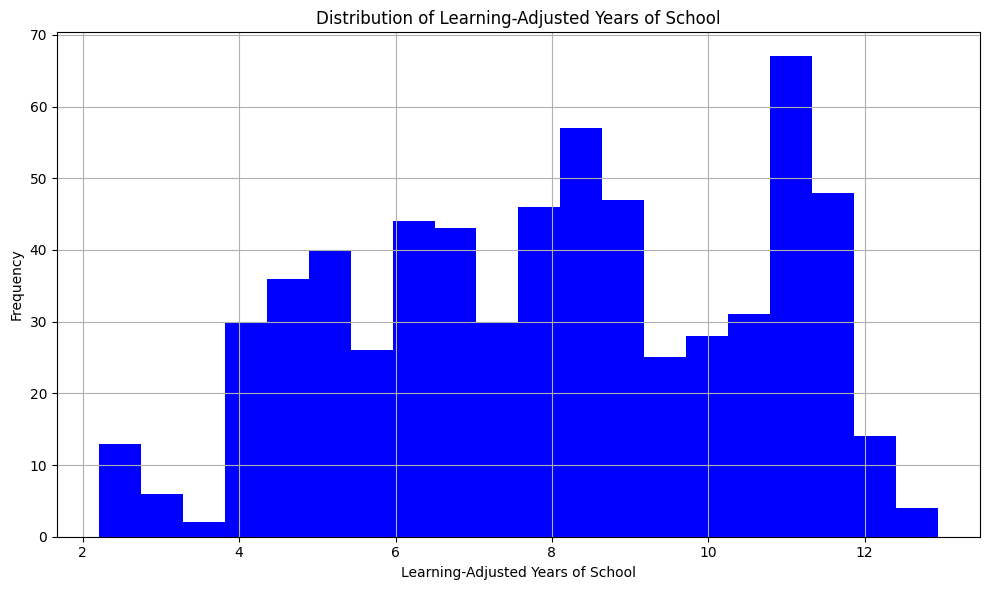

In [70]:
# Create histograma
plt.figure(figsize=(10, 6))
plt.hist(learning_adjusted['Learning-Adjusted Years of School'], bins=20, color='blue')
plt.title('Distribution of Learning-Adjusted Years of School')
plt.xlabel('Learning-Adjusted Years of School')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# graph
plt.show()

2-Descriptive statistics: I calculate basic descriptive statistics, such as the mean, median, standard deviation, to understand the distribution of years of schooling.

In [20]:
# Calculate Descriptive statistics
mean_years = learning_adjusted['Learning-Adjusted Years of School'].mean()
median_years = learning_adjusted['Learning-Adjusted Years of School'].median()
std_dev = learning_adjusted['Learning-Adjusted Years of School'].std()

print("Mean:", mean_years)
print("Median:", median_years)
print("Standard Deviation:", std_dev)


Mean: 8.017870685714286
Median: 8.169077
Standard Deviation: 2.547376650143755


Mean :

The mean is the average of the “Learning-Adjusted Years of School” in the dataset. In this case, the mean is approximately 8.02 years. This means that, on average, people in the dataset have spent about 8.02 years in school, taking into account the learning adjustment.

Median :

The median is the value that separates the upper and lower half of an ordered dataset. In this case, the median is approximately 8.17 years. This indicates that half of the observations in the dataset have less than 8.17 years of learning-adjusted schooling, while the other half has more than 8.17 years.

Standard Deviation:

The standard deviation is a measure of the dispersion or variability of a dataset. In this case, the standard deviation is approximately 2.55 years. This indicates that the “Learning-Adjusted Years of School” in the dataset tend to vary around 2.55 years from the mean. A higher standard deviation indicates a greater dispersion of the data, which means that the learning-adjusted years of schooling are more dispersed around the mean.

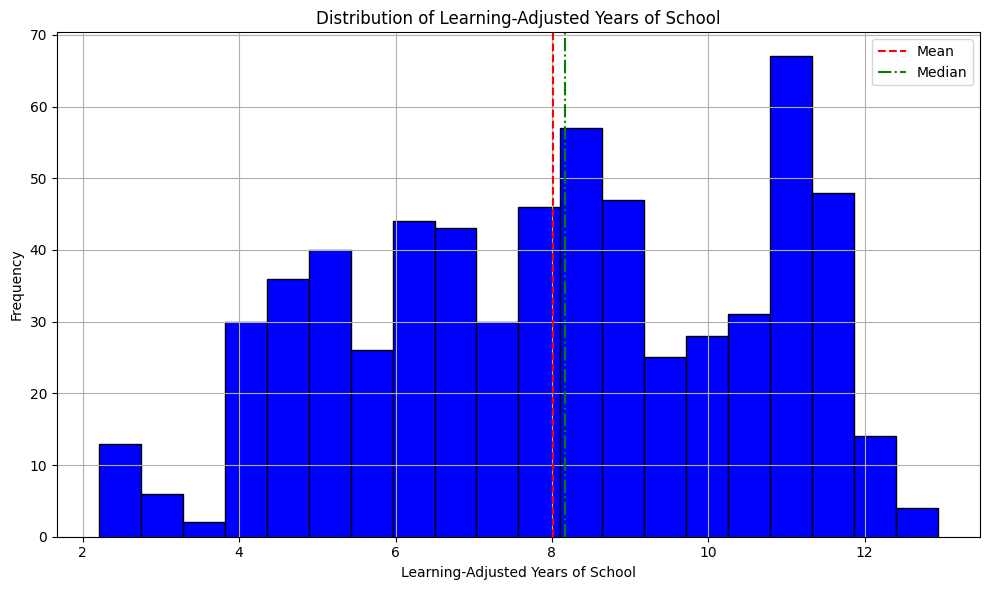

In [67]:
# Create histograma
plt.figure(figsize=(10, 6))
plt.hist(learning_adjusted['Learning-Adjusted Years of School'], bins=20, color='blue', edgecolor='black')
plt.axvline(x=mean_years, color='red', linestyle='--', label='Mean')
plt.axvline(x=median_years, color='green', linestyle='-.', label='Median')
plt.title('Distribution of Learning-Adjusted Years of School')
plt.xlabel('Learning-Adjusted Years of School')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Graph
plt.show()

Number of out-of-school children:

In [22]:

# Load number-of-out-of-school-children.csv
out_of_school = pd.read_csv('3- number-of-out-of-school-children.csv')

# Analyze 'Out-of-school children, adolescents and youth'

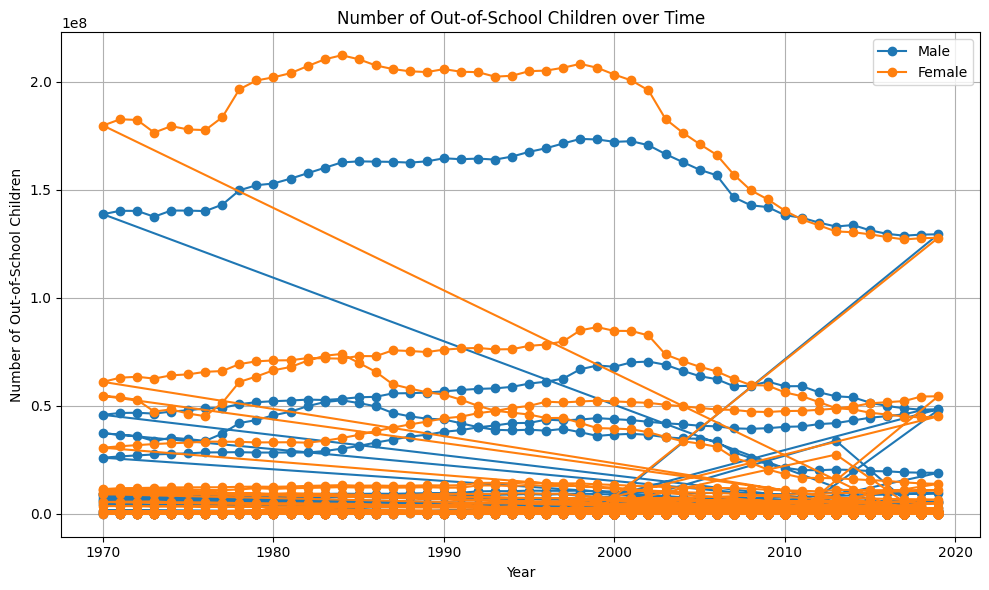

In [23]:
# Create graph 
plt.figure(figsize=(10, 6))
plt.plot(out_of_school['Year'], out_of_school['Out-of-school children, adolescents and youth of primary and secondary school age, male (number)'], marker='o', linestyle='-', label='Male')
plt.plot(out_of_school['Year'], out_of_school['Out-of-school children, adolescents and youth of primary and secondary school age, female (number)'], marker='o', linestyle='-', label='Female')
plt.title('Number of Out-of-School Children over Time')
plt.xlabel('Year')
plt.ylabel('Number of Out-of-School Children')
plt.legend()
plt.grid(True)
plt.tight_layout()

# graph 
plt.show()

This code creates a line graph that shows how the number of out-of-school children has varied over time, broken down by gender (male and female). You can observe the general trend of decrease or increase in the number of out-of-school children and detect specific years that stand out in terms of significant changes in the number of out-of-school children.


This code creates a bar graph that shows the total number of out-of-school children broken down by gender (male and female)

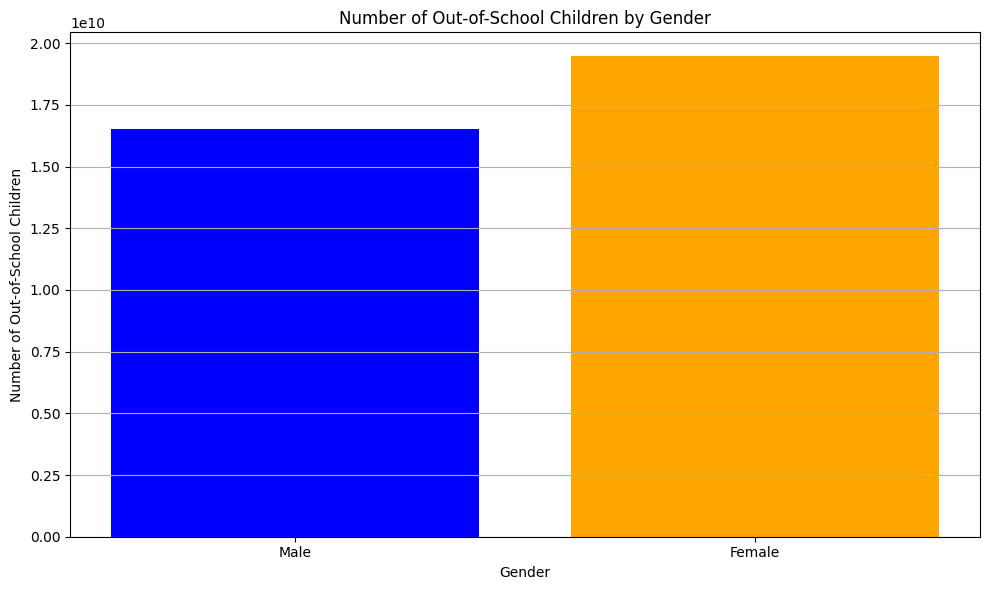

In [71]:
# Breackdown by Gender
plt.figure(figsize=(10, 6))
plt.bar(['Male', 'Female'], [out_of_school['Out-of-school children, adolescents and youth of primary and secondary school age, male (number)'].sum(), out_of_school['Out-of-school children, adolescents and youth of primary and secondary school age, female (number)'].sum()], color=['blue', 'orange'])
plt.title('Number of Out-of-School Children by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Out-of-School Children')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [25]:
# Breakdown by geographic location
regiones = out_of_school['Entity'].unique()  # Get the unique geographic regions

# Create a dictionary to store the total number of out-of-school children by region
total_ninos_no_escolarizados_por_region = {}

for region in regiones:
    total_ninos_no_escolarizados_por_region[region] = out_of_school[out_of_school['Entity'] == region]['Out-of-school children, adolescents and youth of primary and secondary school age, male (number)'].sum()

# Sort the dictionary by the number of out-of-school children
total_ninos_no_escolarizados_por_region = dict(sorted(total_ninos_no_escolarizados_por_region.items(), key=lambda item: item[1], reverse=True))



C:\Users\Usuario\AppData\Local\Temp\ipykernel_8204\3646376173.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


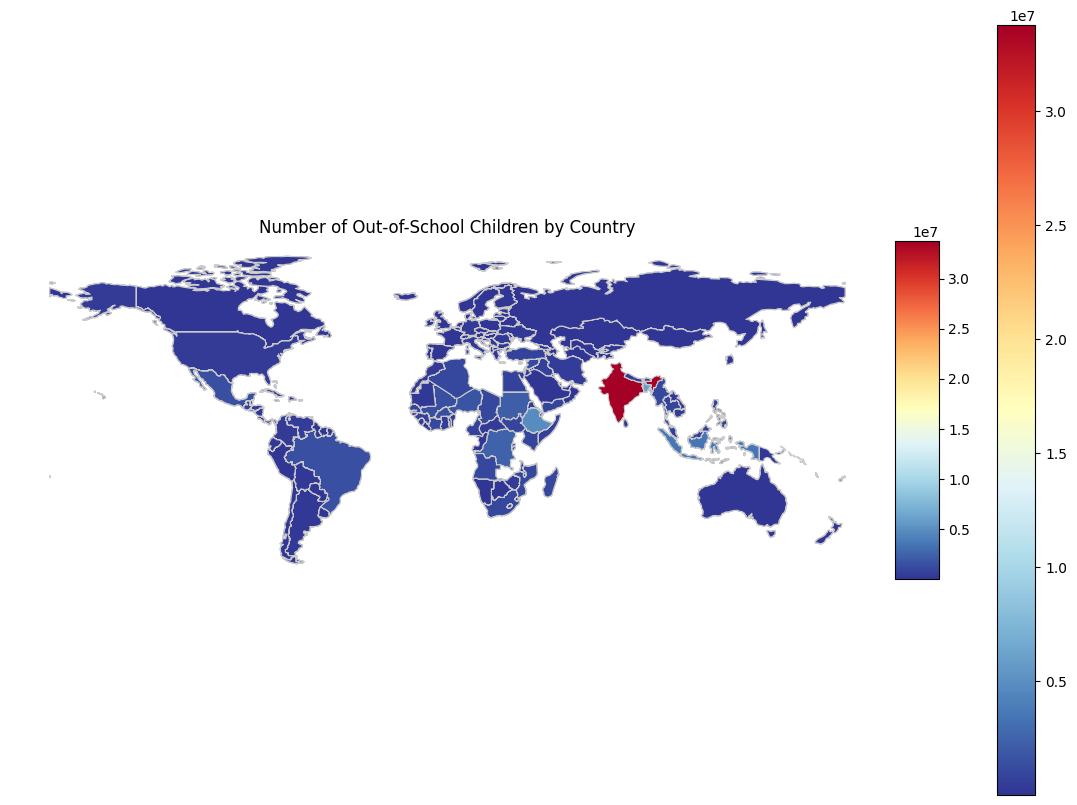

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the shapefile with the country borders
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map data with the out-of-school children data
world = world.merge(out_of_school, left_on='iso_a3', right_on='Code', how='left')

# Create the map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(column='Out-of-school children, adolescents and youth of primary and secondary school age, male (number)', cmap='RdYlBu_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Number of Out-of-School Children by Country')
ax.set_axis_off()  


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Define el tamaño y la posición de la barra de color
sm = plt.cm.ScalarMappable(cmap='RdYlBu_r', norm=plt.Normalize(vmin=world['Out-of-school children, adolescents and youth of primary and secondary school age, male (number)'].min(), vmax=world['Out-of-school children, adolescents and youth of primary and secondary school age, male (number)'].max()))
sm._A = []
cbar = plt.colorbar(sm, cax=cax)

plt.show()


This map provides a visual representation of global disparities in education. Countries are color-coded according to the number of children who do not attend school, with lighter shades representing lower numbers and darker shades indicating higher numbers. 

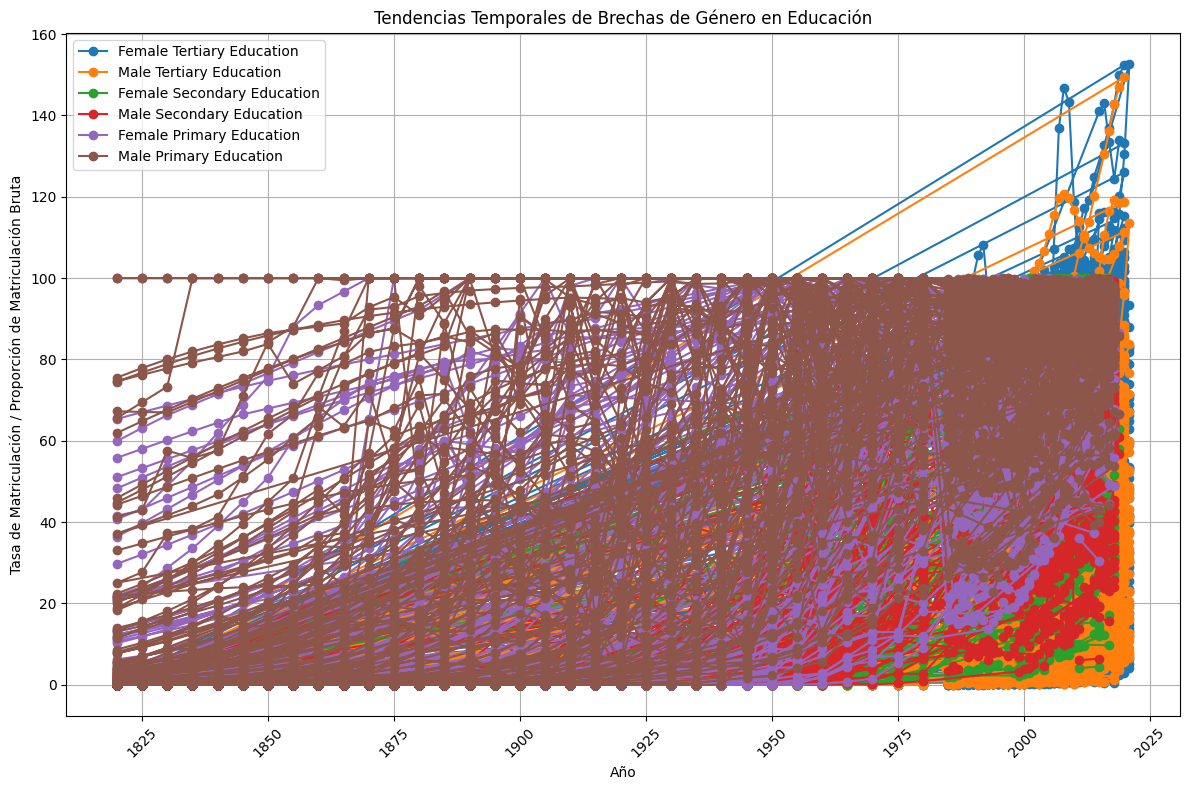

In [74]:
import matplotlib.pyplot as plt

# Filter the data to get only the relevant columns
data = df4[['Year',
            'Combined gross enrolment ratio for tertiary education, female',
            'Combined gross enrolment ratio for tertiary education, male',
            'Combined total net enrolment rate, secondary, female',
            'Combined total net enrolment rate, secondary, male',
            'Combined total net enrolment rate, primary, female',
            'Combined total net enrolment rate, primary, male']]

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Graficar las tendencias temporales para cada indicador
plt.plot(data['Year'], data['Combined gross enrolment ratio for tertiary education, female'], label='Female Tertiary Education', marker='o')
plt.plot(data['Year'], data['Combined gross enrolment ratio for tertiary education, male'], label='Male Tertiary Education', marker='o')
plt.plot(data['Year'], data['Combined total net enrolment rate, secondary, female'], label='Female Secondary Education', marker='o')
plt.plot(data['Year'], data['Combined total net enrolment rate, secondary, male'], label='Male Secondary Education', marker='o')
plt.plot(data['Year'], data['Combined total net enrolment rate, primary, female'], label='Female Primary Education', marker='o')
plt.plot(data['Year'], data['Combined total net enrolment rate, primary, male'], label='Male Primary Education', marker='o')

# # Customize the graph
plt.title('Tendencias Temporales de Brechas de Género en Educación')
plt.xlabel('Año')
plt.ylabel('Tasa de Matriculación / Proporción de Matriculación Bruta')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout()

# graph
plt.show()


This code plots line graphs for each education indicator over time, showing the temporal trends of gender gaps at different educational levels. You can visually observe how these gaps have changed over the years and determine whether there have been improvements or deteriorations in gender equality in education

Gender comparison: This compares the enrollment rates and gross enrollment ratio between men and women at each educational level. This will allow you to identify areas where there are significant differences in educational participation between genders and analyze possible disparities.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8204\354517342.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Diff_tertiary'] = data['Combined gross enrolment ratio for tertiary education, female'] - data['Combined gross enrolment ratio for tertiary education, male']
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8204\354517342.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Diff_secondary'] = data['Combined total net enrolment rate, secondary, female'] - data['Combined total net enrolme

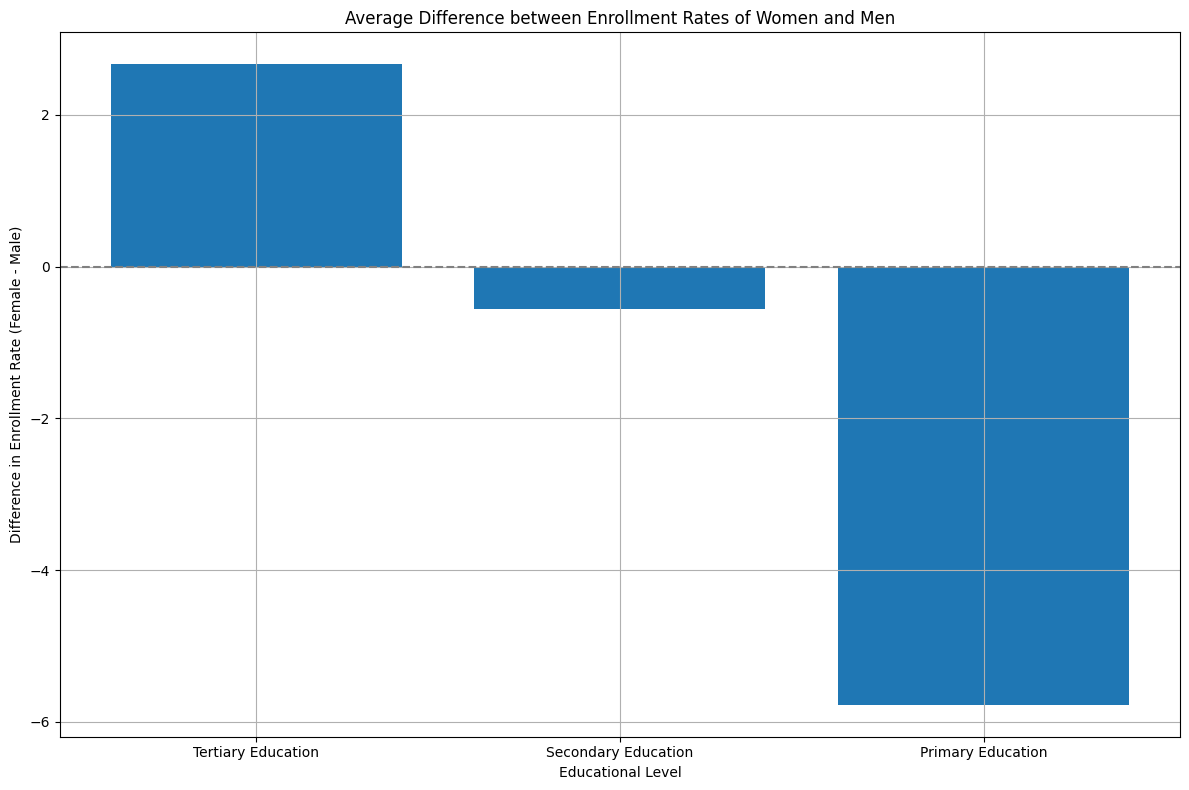

In [94]:
import matplotlib.pyplot as plt

# Filter the data to get only the relevant columns
data = df4[['Combined gross enrolment ratio for tertiary education, female',
            'Combined gross enrolment ratio for tertiary education, male',
            'Combined total net enrolment rate, secondary, female',
            'Combined total net enrolment rate, secondary, male',
            'Combined total net enrolment rate, primary, female',
            'Combined total net enrolment rate, primary, male']]

# Calculate the difference between the enrollment rates of women and men for each educational level
data['Diff_tertiary'] = data['Combined gross enrolment ratio for tertiary education, female'] - data['Combined gross enrolment ratio for tertiary education, male']
data['Diff_secondary'] = data['Combined total net enrolment rate, secondary, female'] - data['Combined total net enrolment rate, secondary, male']
data['Diff_primary'] = data['Combined total net enrolment rate, primary, female'] - data['Combined total net enrolment rate, primary, male']

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Plot the gender differences for each educational level
plt.bar(['Tertiary Education', 'Secondary Education', 'Primary Education'],
        [data['Diff_tertiary'].mean(), data['Diff_secondary'].mean(), data['Diff_primary'].mean()])

# Customize the graph
plt.title('Average Difference between Enrollment Rates of Women and Men')
plt.xlabel('Educational Level')
plt.ylabel('Difference in Enrollment Rate (Female - Male)')
plt.axhline(y=0, color='gray', linestyle='--')  # Agregar línea base en cero para referencia
plt.grid(True)
plt.tight_layout()

# graph
plt.show()


In [76]:
data = df4[['Entity',
            'Combined gross enrolment ratio for tertiary education, female',
            'Combined gross enrolment ratio for tertiary education, male',
            'Combined total net enrolment rate, secondary, female',
            'Combined total net enrolment rate, secondary, male',
            'Combined total net enrolment rate, primary, female',
            'Combined total net enrolment rate, primary, male']]

# Agrupar los datos por país
grouped_data = data.groupby('Entity')

# Calculate descriptive statistics for each country
descriptive_stats = grouped_data.agg({'Combined gross enrolment ratio for tertiary education, female': ['mean', 'median', 'std'],
                                      'Combined gross enrolment ratio for tertiary education, male': ['mean', 'median', 'std'],
                                      'Combined total net enrolment rate, secondary, female': ['mean', 'median', 'std'],
                                      'Combined total net enrolment rate, secondary, male': ['mean', 'median', 'std'],
                                      'Combined total net enrolment rate, primary, female': ['mean', 'median', 'std'],
                                      'Combined total net enrolment rate, primary, male': ['mean', 'median', 'std']})

# Display descriptive statistics by country
print(descriptive_stats)

               Combined gross enrolment ratio for tertiary education, female  \
                                                                        mean   
Entity                                                                         
Afghanistan                                              0.515785              
Africa                                                   0.276911              
Albania                                                 18.243837              
Algeria                                                 15.003740              
American Samoa                                          21.669630              
...                                                           ...              
Vietnam                                                 18.943338              
World                                                   13.209452              
Yemen                                                    1.331734              
Zambia                                  

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


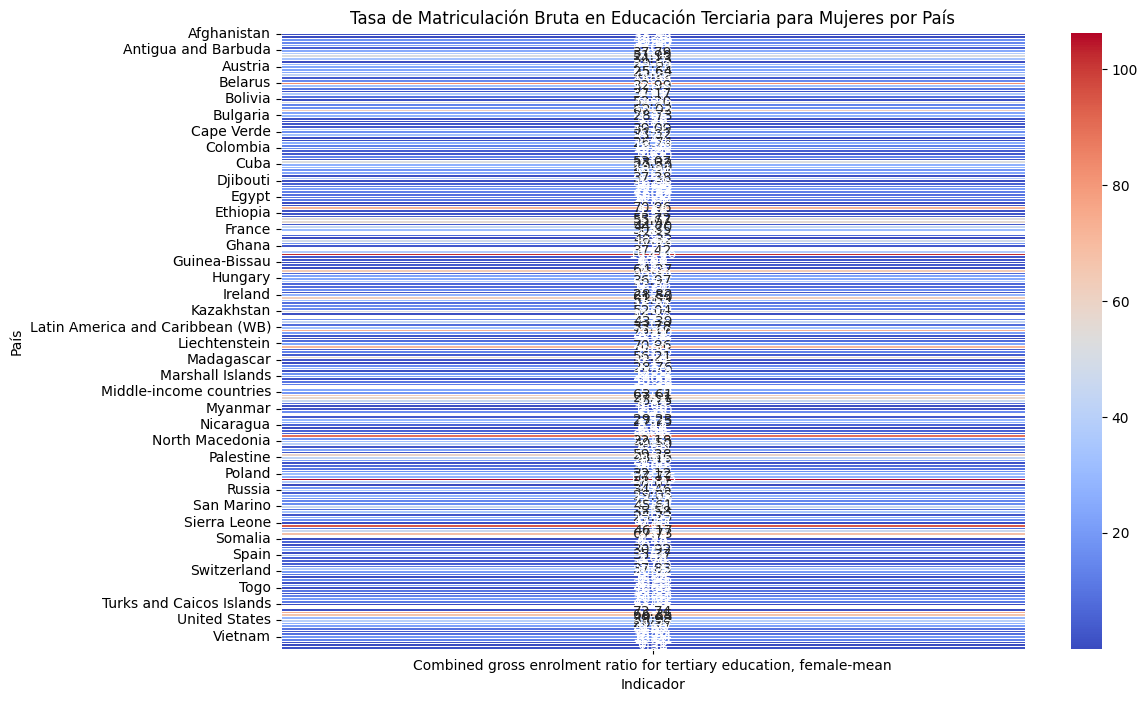

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Create map the heat
sns.heatmap(mean_values.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Personalizar el título y los ejes
plt.title('Tasa de Matriculación Bruta en Educación Terciaria para Mujeres por País')
plt.xlabel('Indicador')
plt.ylabel('País')

# Display the heat map
plt.show()


In [85]:
print(df.columns)


Index(['Entity', 'Code', 'Year',
       'Share of population with no formal education, 1820-2020',
       'Share of population with some formal education, 1820-2020'],
      dtype='object')


This code will fit a linear regression model using the historical data available in your DataFrame and then make predictions for the upcoming years.

In [93]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


# Select the features (Year) and the target variable (Share of population with no formal education)”
X = df[['Year']].values
y = df['Share of population with no formal education, 1820-2020'].values

#Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict for the upcoming years
future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)
predictions = model.predict(future_years)

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'Year': future_years.flatten(), 'Predictions': predictions})
print(predictions_df)


   Year  Predictions
0  2025     8.298341
1  2026     7.841863
2  2027     7.385385
3  2028     6.928906
4  2029     6.472428
5  2030     6.015949


Interpret these predictions:

Each row represents a future year. In the ‘Year’ column, the years for which predictions are being made are displayed. In the ‘Predictions’ column, the corresponding predictions of the proportion of the population without formal education for those years are shown.

For the year 2025, the model predicts a proportion of the population without formal education of approximately 8.30. For the year 2026, the prediction is a proportion of around 7.84
2027- 7.38 
2028- 6.92
2029- 6.47
2030- 6.01

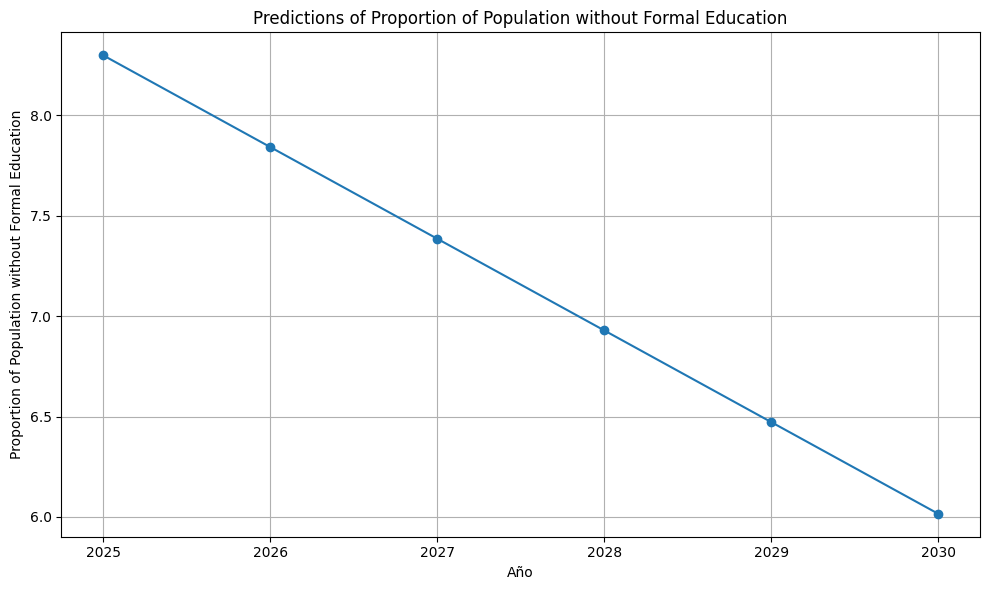

In [92]:
import matplotlib.pyplot as plt

# Datos de predicción
years = predictions_df['Year']
predictions = predictions_df['Predictions']

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(years, predictions, marker='o', linestyle='-')
plt.title('Predictions of Proportion of Population without Formal Education')
plt.xlabel('Año')
plt.ylabel('Proportion of Population without Formal Education')
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()
